## IRANIAN TELECOM CHURN PREDICTION

This is a dataset that is randomly collected from an Iranina telecommunication company. In this project I try to predict churn customers in the telecommunication company using different variables

What is churn- Churn is the measure of how many customers stop using a product. This can be measured based on actual usage or failure to renew (when the product is sold using a subscription model). Often evaluated for a specific period of time, there can be a monthly, quarterly, or annual churn rate.

The different variables in the dataset-
- **Call Failures**: number of call failures
- **Complains**: binary (0: No complaint, 1: complaint)
- **Subscription Length**: total months of subscription
- **Charge Amount**: Ordinal attribute (0: lowest amount, 9: highest amount)
- **Seconds of Use**: total seconds of calls
- **Frequency of use**: total number of calls
- **Frequency of SMS**: total number of text messages
- **Distinct Called Numbers**: total number of distinct phone calls 
- **Age Group**: ordinal attribute (1: younger age, 5: older age)
- **Tariff Plan**: binary (1: Pay as you go, 2: contractual)
- **Status**: binary (1: active, 2: non-active)
- **Churn: binary** (1: churn, 0: non-churn) - Class label
- **Customer Value**: The calculated value of customer

In [1]:
# Import the libraries that I am going to use in this project

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning- this is a classification problem
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

In [3]:
# Import the dataset
df=pd.read_csv("Customer Churn.csv")

In [4]:
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

Perform statistics in the dataset using describe

In [6]:
df.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


Observations made here-
- There are no null values
- Some variables seems to have outliers by looking at the minimum and the maximum values


In [7]:
df.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

### perform some exploratory data analysis

I will plot some histograms and boxplots to show the extent of outliers in the dataset

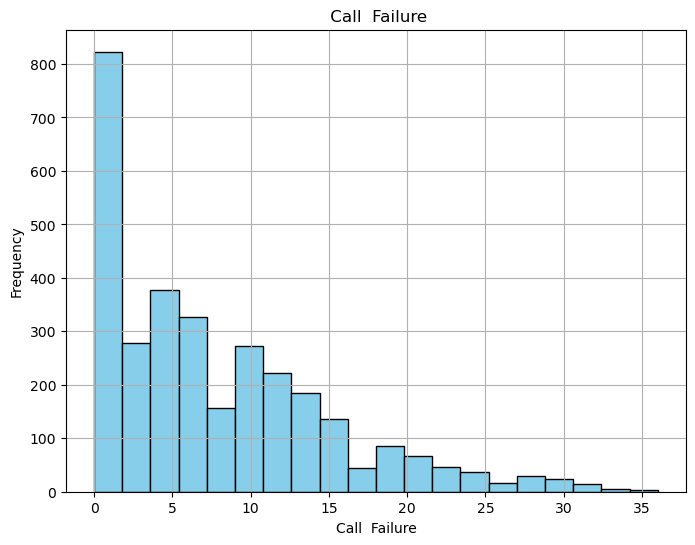

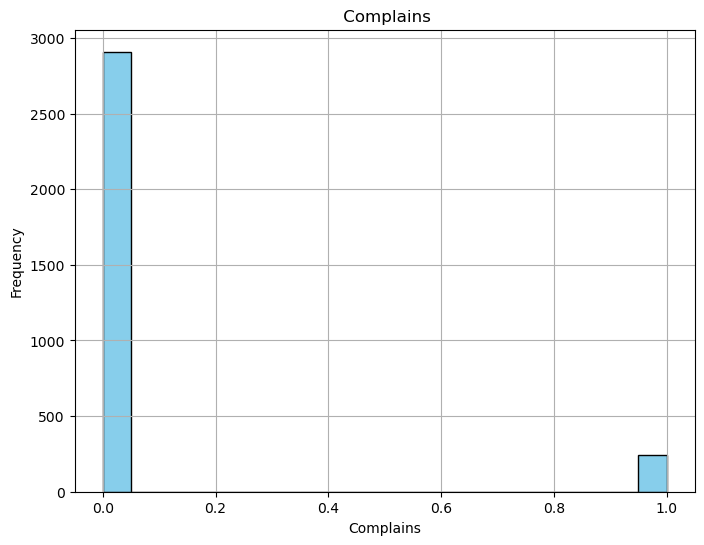

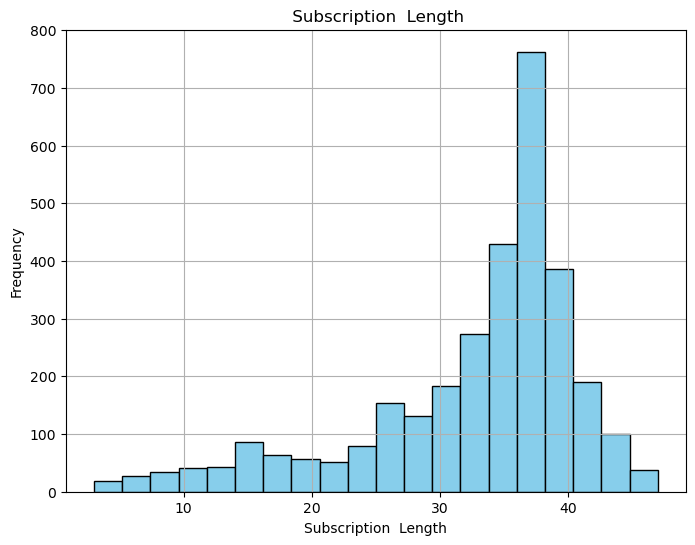

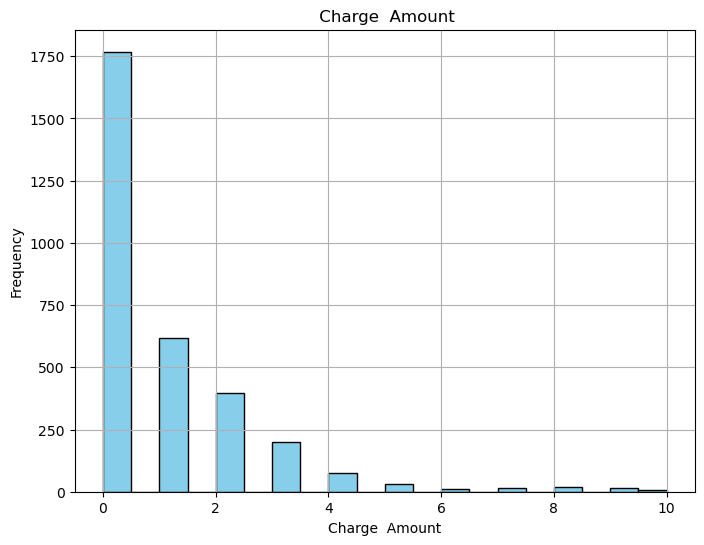

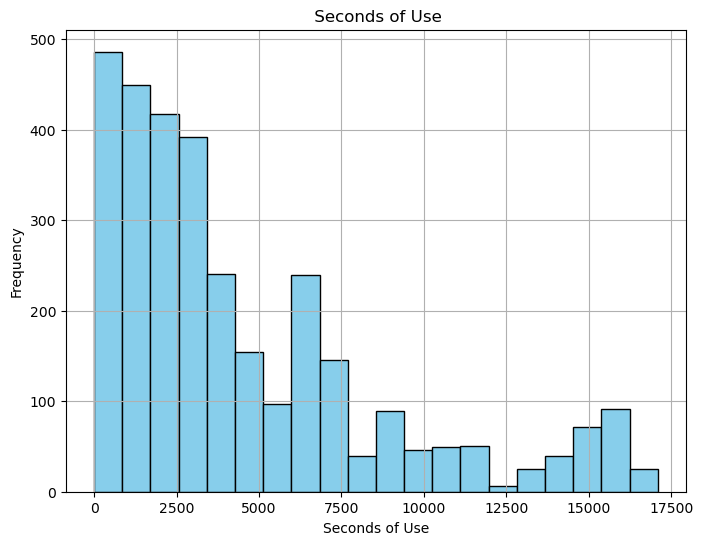

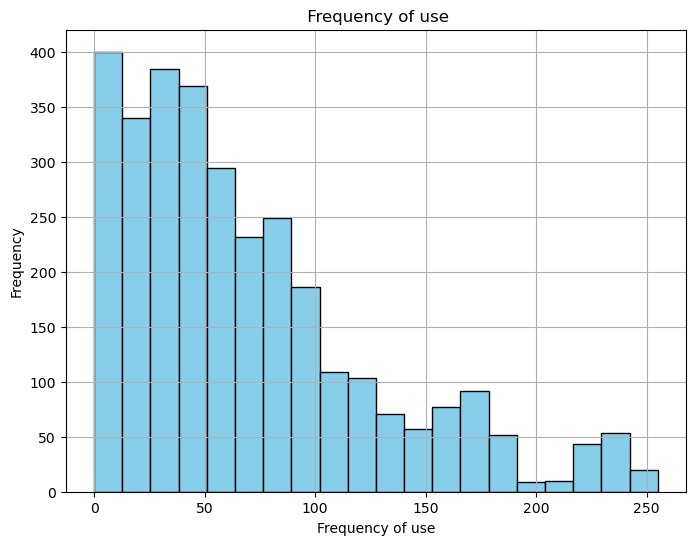

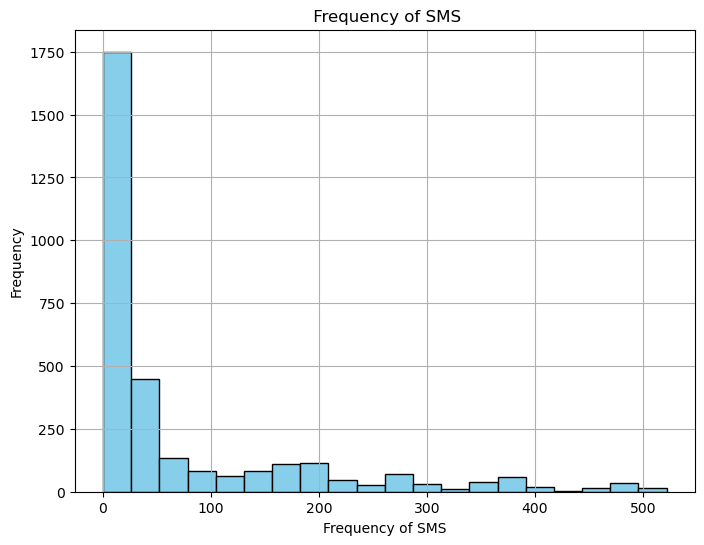

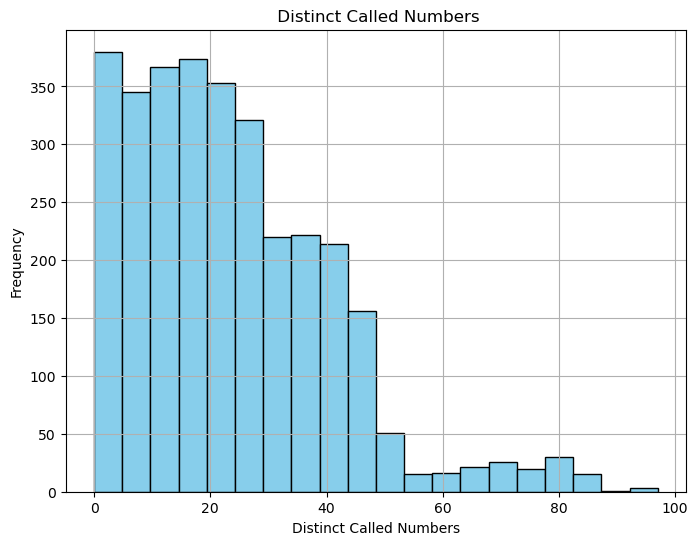

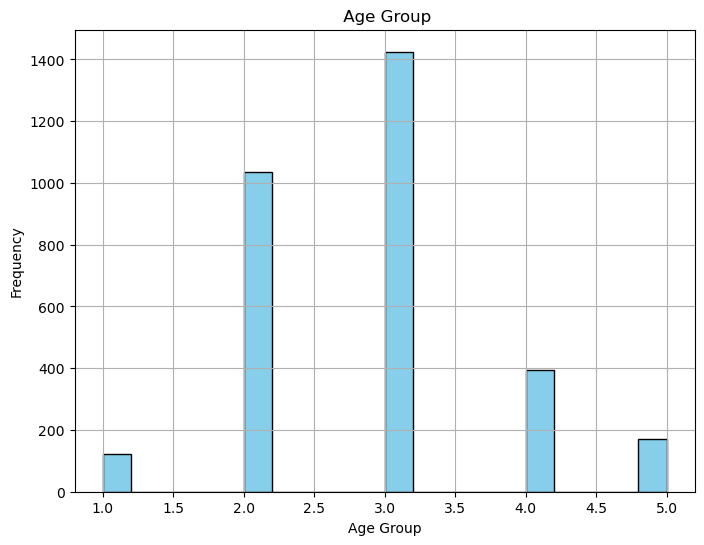

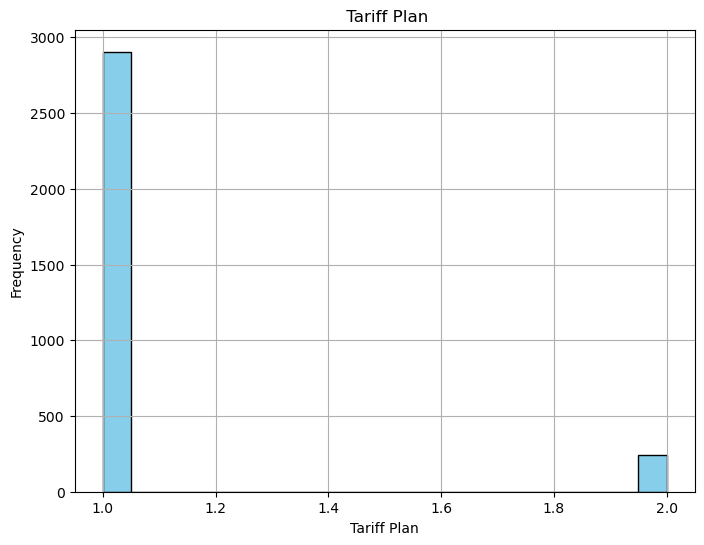

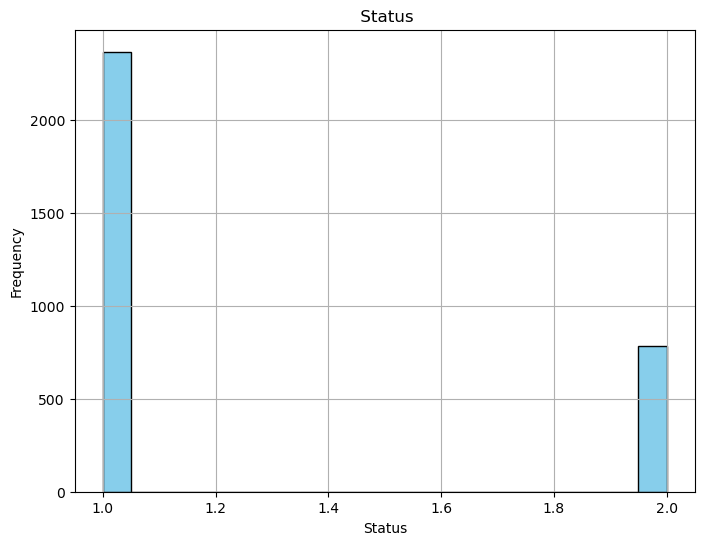

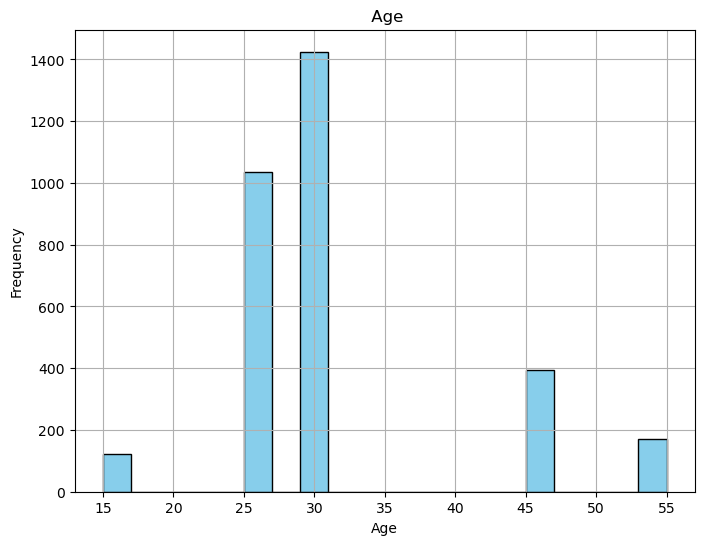

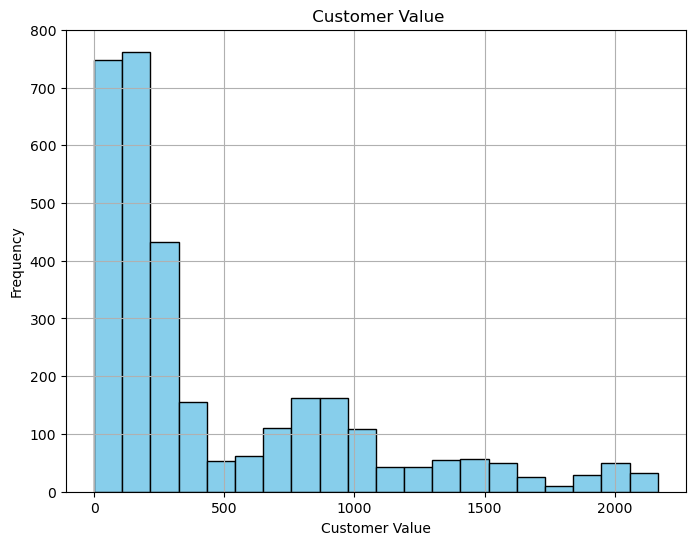

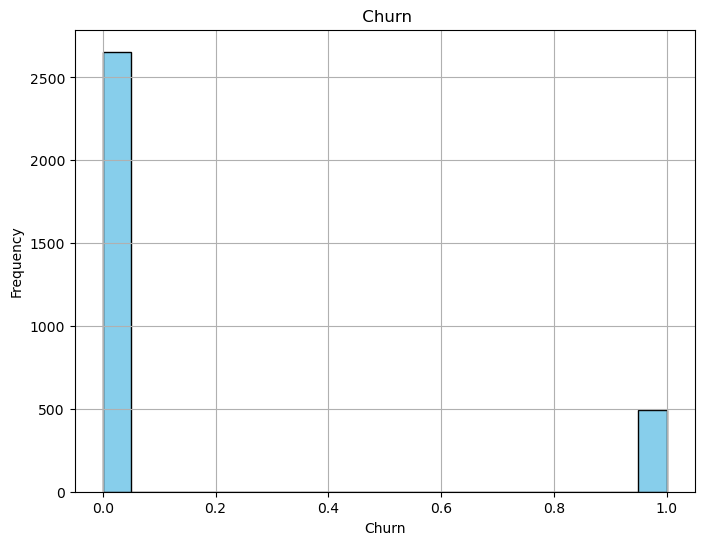

In [9]:
for column in df.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f' {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


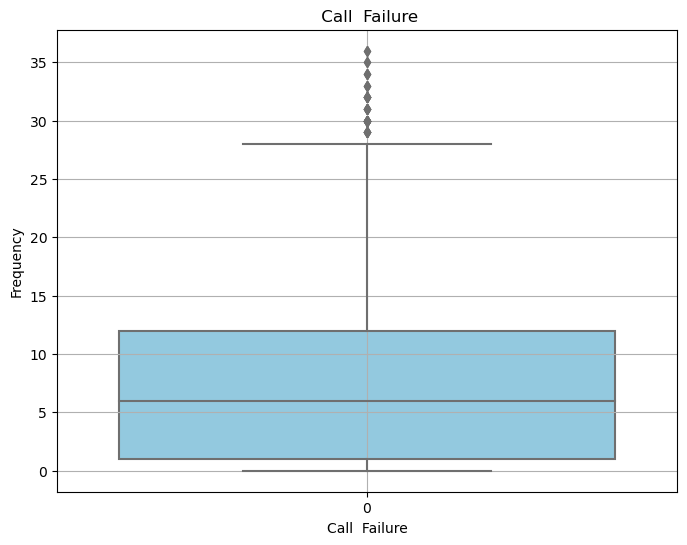

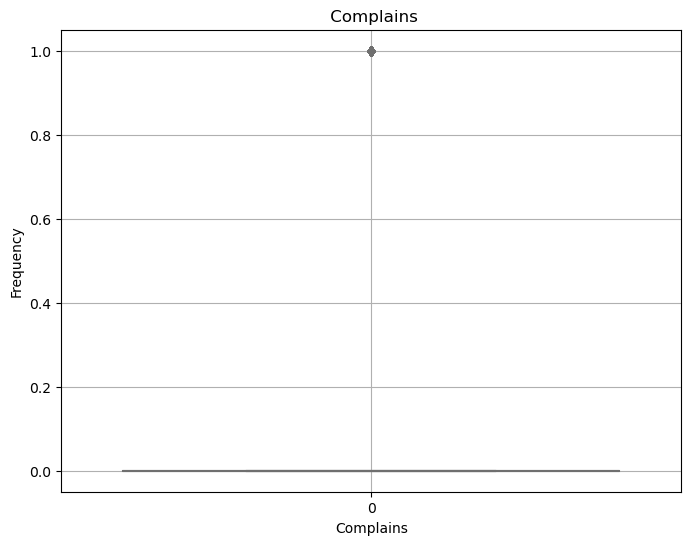

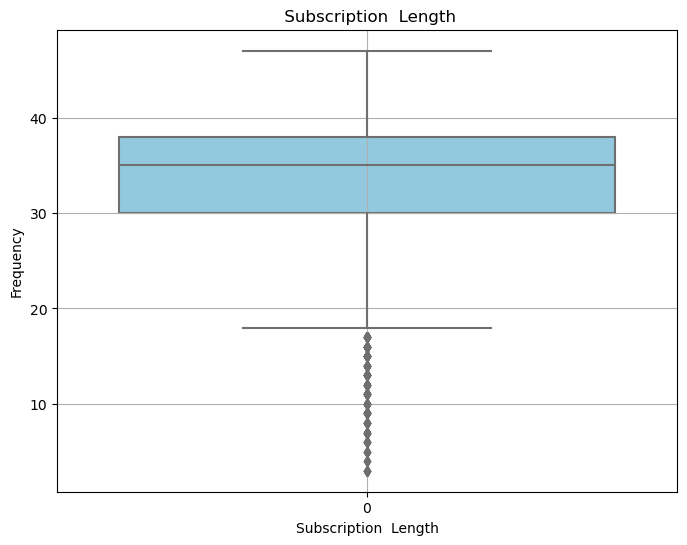

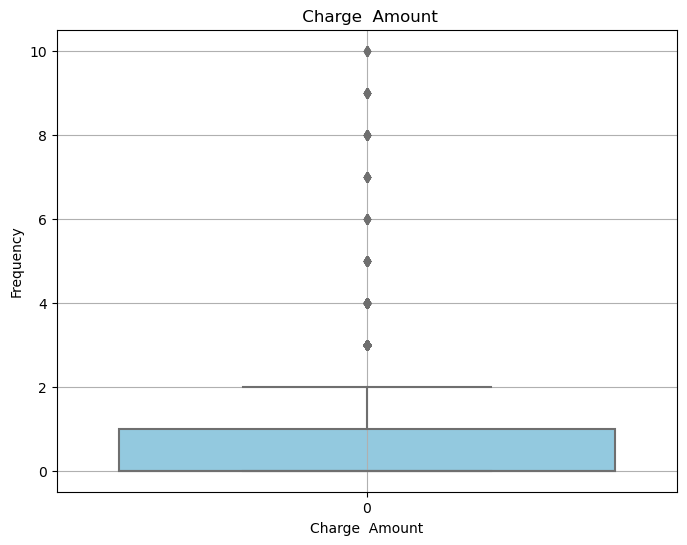

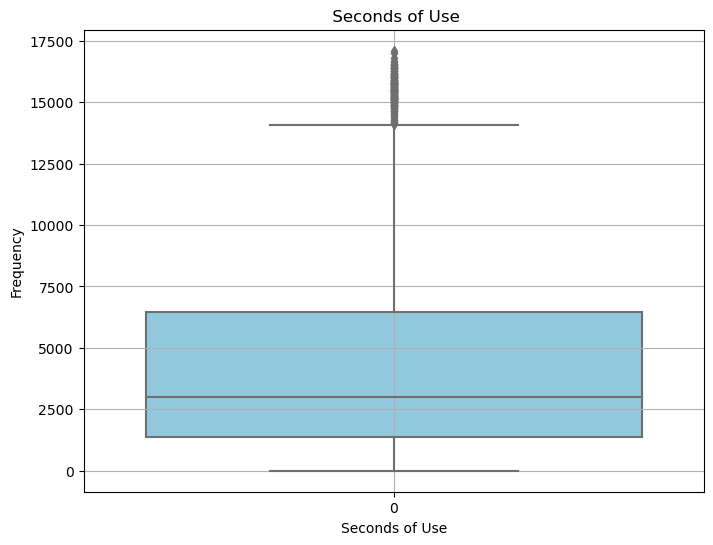

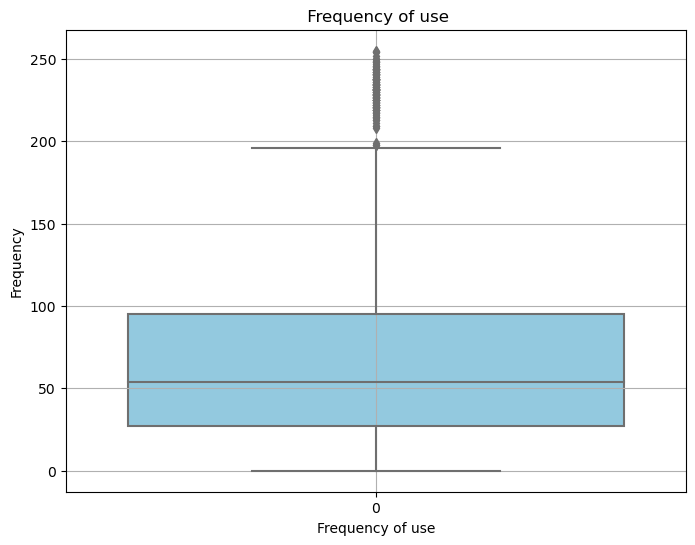

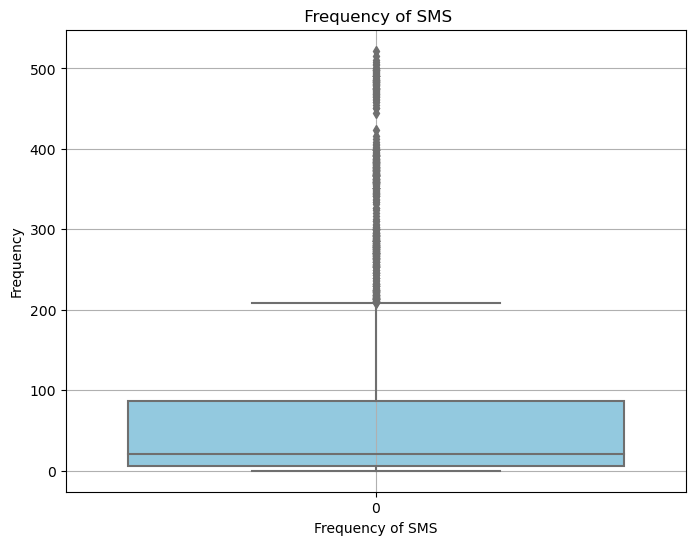

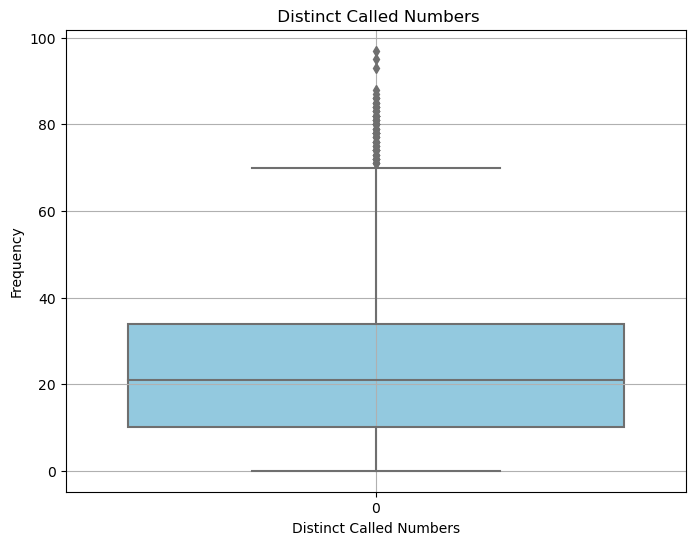

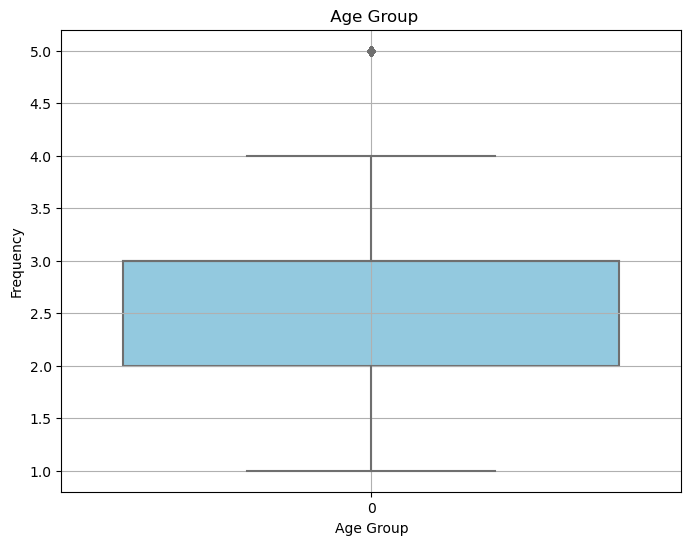

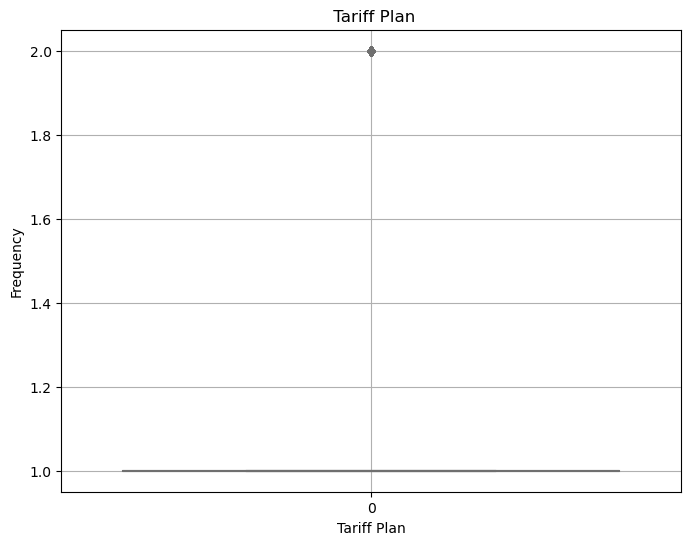

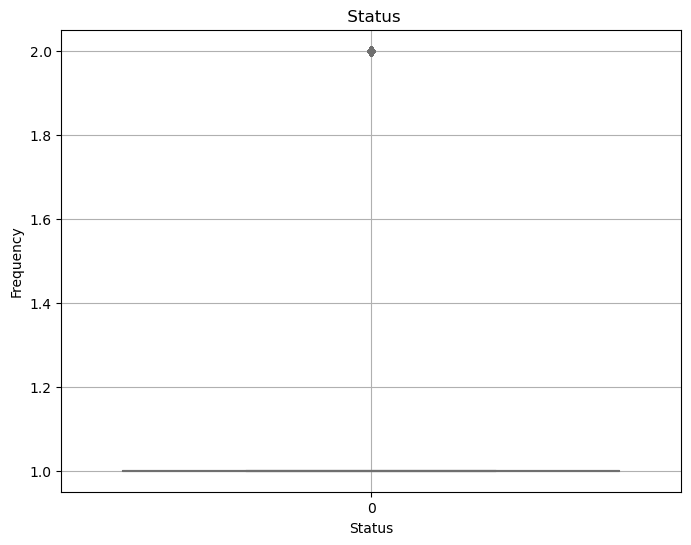

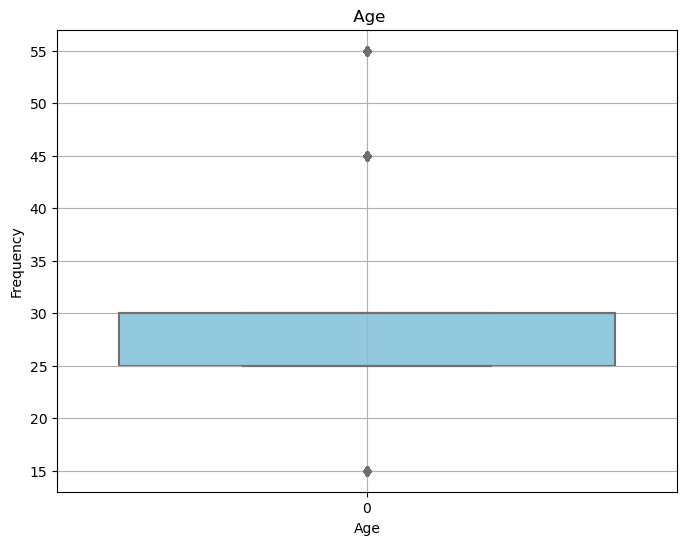

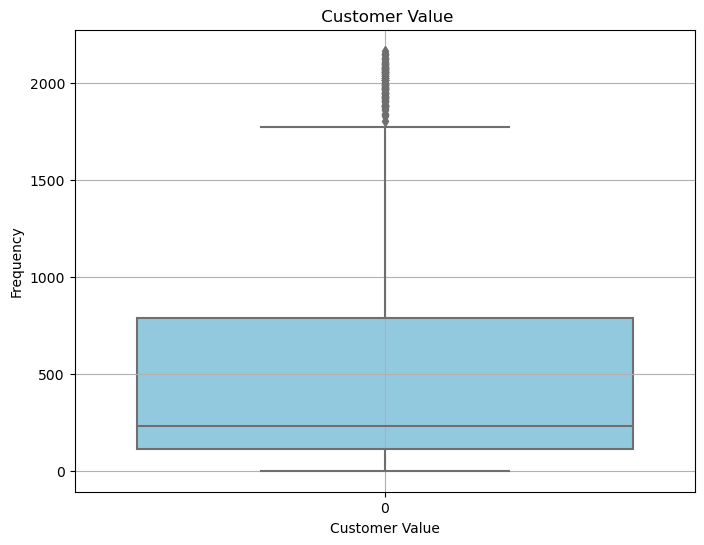

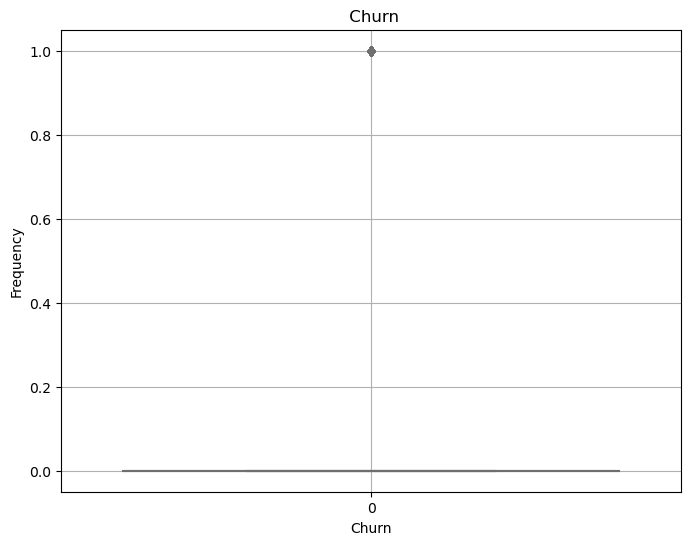

In [10]:
for col in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=churn[col], color='skyblue')
    plt.title(f' {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

By looking at the histograms and boxplot, it realy shows that there are outliers in this dataset

Let me look at the target variable - churn and see how it is balanced

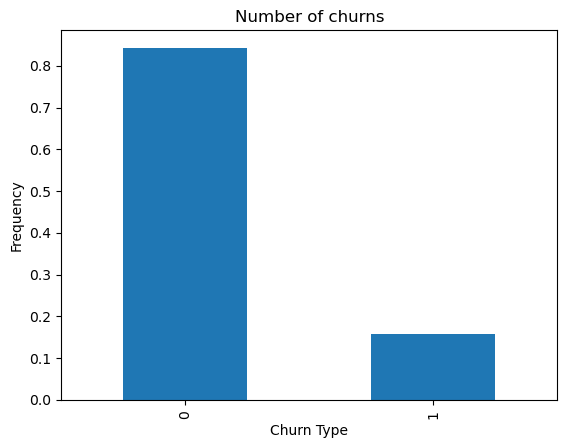

In [31]:
# Since churn is a categorical variable, let me check its numbers
df['Churn'].value_counts(normalize=True).plot(kind="bar")
plt.xlabel("Churn Type")
plt.ylabel("Frequency")
plt.title("Number of churns");

# Highly imbalanced dataset

The dataset is highly imbalanced- I shall deal with it later when building a model. An imbalanced model can affect the model's performance

### Exploratory data analysis

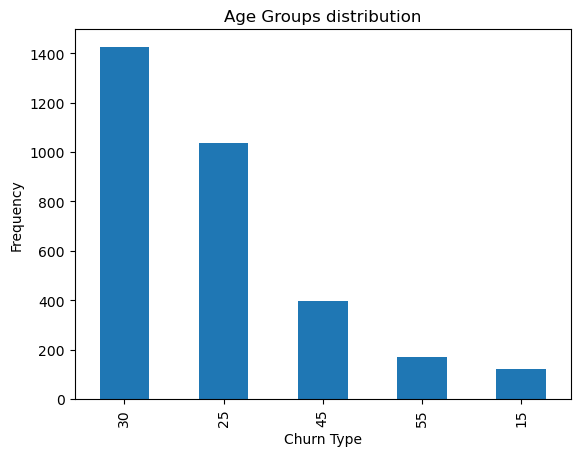

In [17]:
# Age group distribution
df['Age'].value_counts().plot(kind="bar")
plt.xlabel("Churn Type")
plt.ylabel("Frequency")
plt.title("Age Groups distribution");


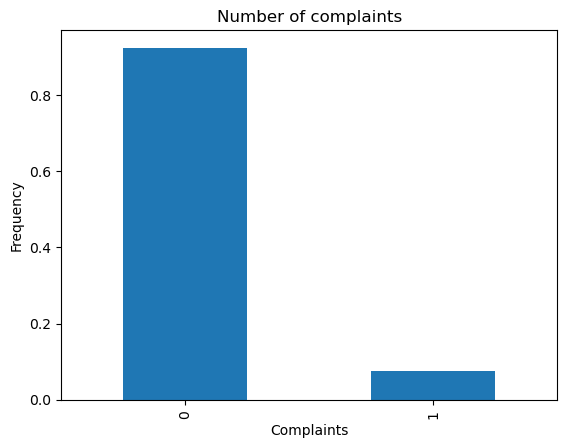

In [30]:
# check complaints
df['Complains'].value_counts(normalize=True).plot(kind="bar")
plt.xlabel("Complaints")
plt.ylabel("Frequency")
plt.title("Number of complaints");

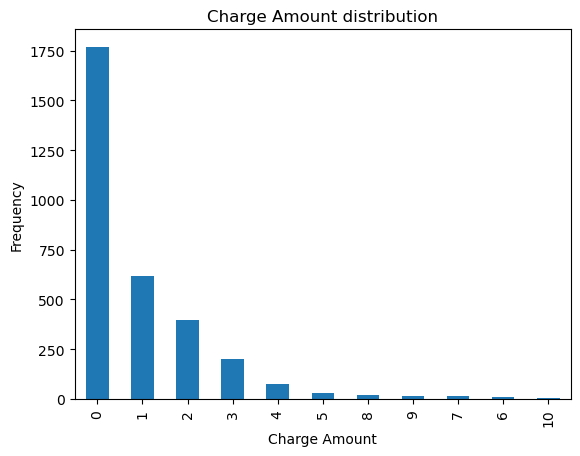

In [18]:
df['Charge  Amount'].value_counts().plot(kind="bar")
plt.xlabel("Charge Amount")
plt.ylabel("Frequency")
plt.title("Charge Amount distribution");

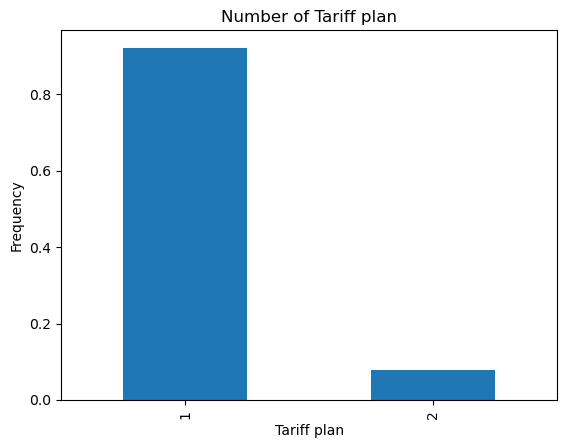

In [29]:
df['Tariff Plan'].value_counts(normalize=True).plot(kind="bar")
plt.xlabel("Tariff plan")
plt.ylabel("Frequency")
plt.title("Number of Tariff plan");


#people using the pay as you go plan are more than the contractual subscribers.

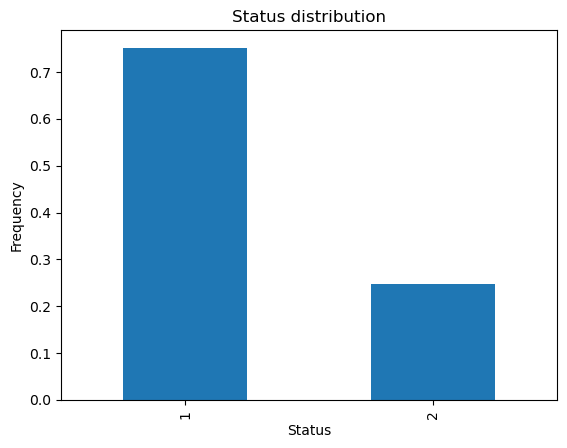

In [28]:
df['Status'].value_counts(normalize=True).plot(kind="bar")
plt.xlabel("Status")
plt.ylabel("Frequency")
plt.title("Status distribution");

**Observations**
- There are 5 five age groups with people in their thirties being the most consumers in the telco company while people below 20 years being the least.
- There were few people complaining about services.
- People using the pay as you go tariff plan are more than contract based people
- Active people using the telco services were more than non active individuals

plotting scatterplots to see how some variables relate

<Axes: xlabel='Seconds of Use', ylabel='Frequency of use'>

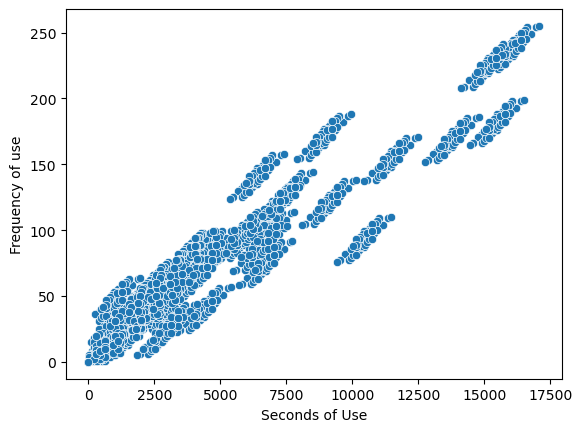

In [36]:
# 
sns.scatterplot(data=df,x='Seconds of Use',  y='Frequency of use')

<Axes: xlabel='Subscription  Length', ylabel='Customer Value'>

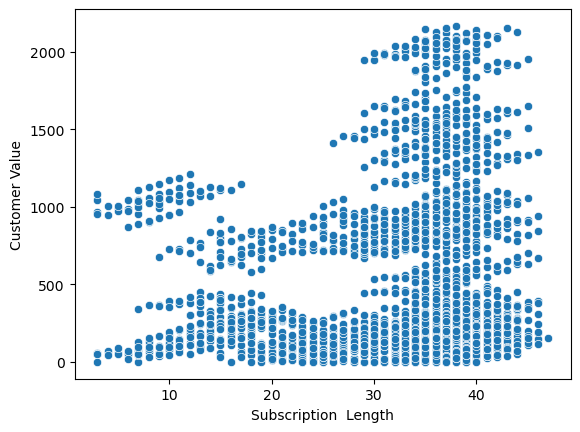

In [40]:
# customer value vs subscription lenggth
sns.scatterplot(data=df,  y='Customer Value',x='Subscription  Length')

# No relaationship

<Axes: xlabel='Frequency of use', ylabel='Customer Value'>

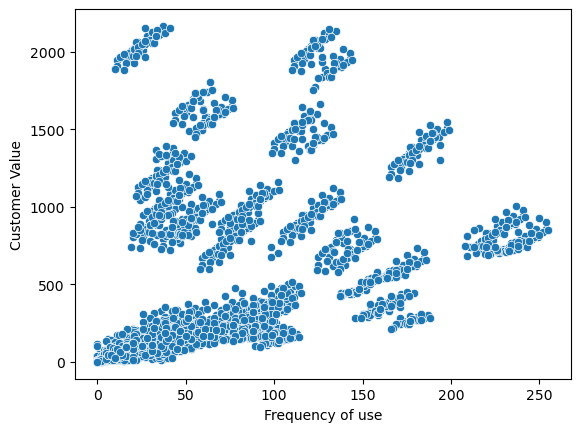

In [41]:
# Customer value vs frequency of use
sns.scatterplot(data=df,  y='Customer Value',x='Frequency of use')

<Axes: xlabel='Seconds of Use', ylabel='Customer Value'>

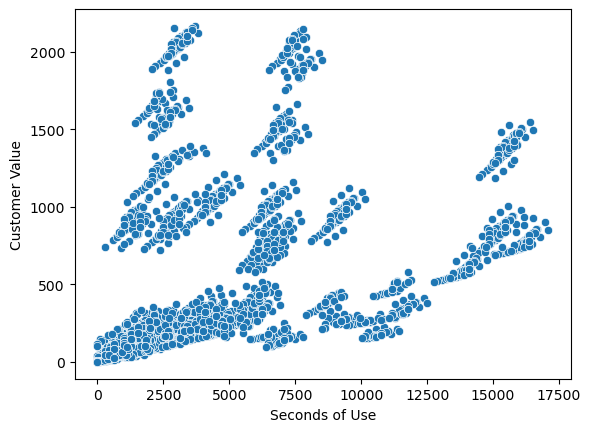

In [42]:
# customer value vs total seconds of calls
sns.scatterplot(data=df,  y='Customer Value',x='Seconds of Use')

<Axes: xlabel='Distinct Called Numbers', ylabel='Call  Failure'>

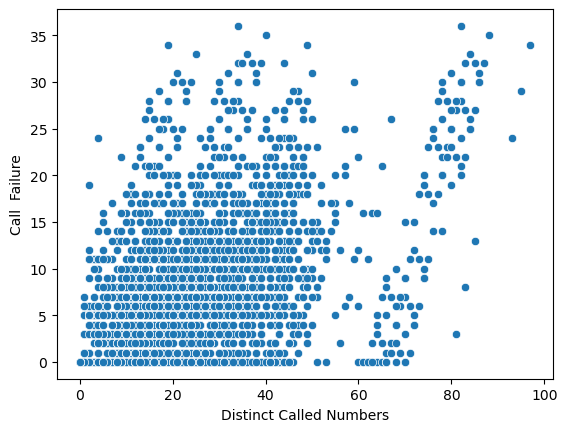

In [45]:
# call failure vs distinct call numbers
sns.scatterplot(data=df,  y='Call  Failure',x='Distinct Called Numbers')

The scatter plots shows that the subscribers are grouped in different segments.\



###  multivariate data analysis


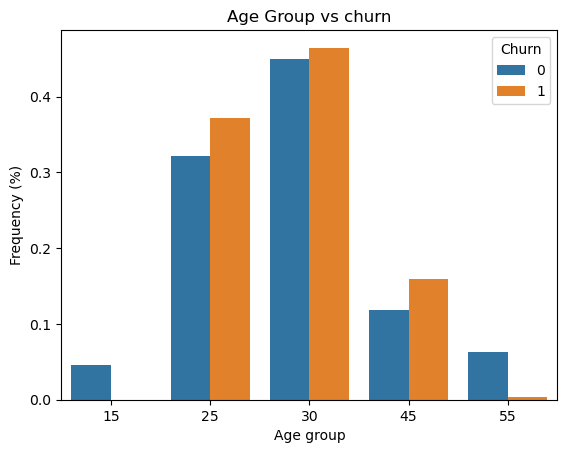

In [46]:
# Age and churn
df_Age=df["Age"].groupby(df["Churn"])\
    .value_counts(normalize=True)\
    .rename("frequency")\
    .to_frame()\
    .reset_index()


# Create bar chart of `df_Age`
sns.barplot(
    x="Age",
    y="frequency",
    hue="Churn",
    data=df_Age
)
plt.xlabel("Age group")
plt.ylabel("Frequency (%)")
plt.title("Age Group vs churn");

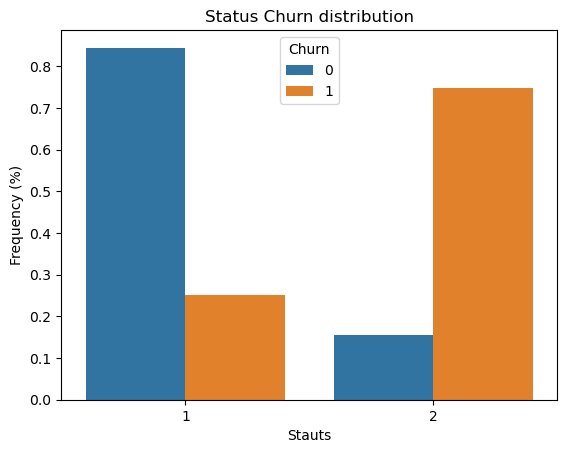

In [48]:
# status and churn
df_status=(df['Status'].groupby(df['Churn'])\
           .value_counts(normalize=True)\
           .rename("frequency")\
           .to_frame()\
           .reset_index()
)

sns.barplot(
    x="Status",
    y="frequency",
    hue="Churn",
    data=df_status
)
plt.xlabel("Stauts")
plt.ylabel("Frequency (%)")
plt.title("Status Churn distribution");

<Axes: xlabel='Tariff Plan', ylabel='Frequency'>

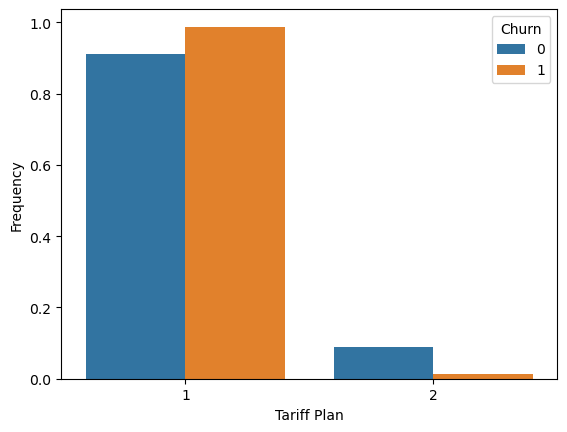

In [49]:
# Tariff plan and churn status

df_tariff=df['Tariff Plan'].groupby(df['Churn'])\
        .value_counts(normalize=True)\
        .rename("Frequency")\
        .to_frame()\
        .reset_index()

sns.barplot(
    x="Tariff Plan",
    y="Frequency",
    hue="Churn",
    data=df_tariff
)

<Axes: xlabel='Complains', ylabel='frequency'>

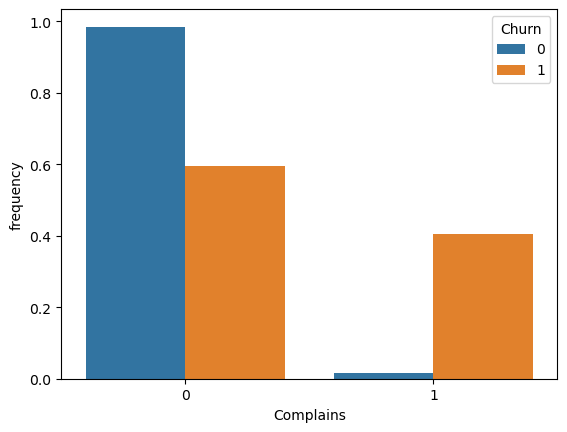

In [50]:
# complaints and churn
df_complains=(
    df['Complains'].groupby(df['Churn'])\
           .value_counts(normalize=True)\
           .rename("frequency")\
           .to_frame()\
           .reset_index()
)

sns.barplot(
    x="Complains",
    y="frequency",
    hue="Churn",
    data=df_complains
)

<Axes: xlabel='Charge  Amount', ylabel='frequency'>

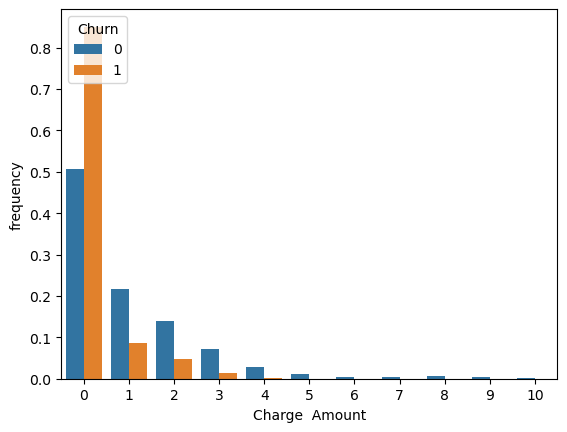

In [51]:
# charge amount vs churn
df_charge_amount=(
    df['Charge  Amount'].groupby(df['Churn'])\
           .value_counts(normalize=True)\
           .rename("frequency")\
           .to_frame()\
           .reset_index()
)

sns.barplot(
    x="Charge  Amount",
    y="frequency",
    hue="Churn",
    data=df_charge_amount
)

**observations**
- Under 20 year olds and over 50 year olds are unlikely to churn
- Non active people churned the most
- People who complain are likely to churn

In [52]:
df_2=df.copy()

## Model Building

In [53]:
# Separate the target column from other variables
target = 'Churn'
X = df_2.drop(columns=target)
y = df_2[target]

In [54]:
X

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640


The numbers in other columns are of different weights and using them may lead to wrong prediction. It is important to scale them to the same weight.

In [56]:
scaler=MinMaxScaler(feature_range=(0, 1)) # using a minmax scaler

In [57]:
X_scaled=scaler.fit_transform(X)

In [58]:
X_scaled

array([[0.22222222, 0.        , 0.79545455, ..., 0.        , 0.375     ,
        0.09127688],
       [0.        , 0.        , 0.81818182, ..., 1.        , 0.25      ,
        0.02126053],
       [0.27777778, 0.        , 0.77272727, ..., 0.        , 0.375     ,
        0.70961723],
       ...,
       [0.36111111, 0.        , 0.34090909, ..., 0.        , 0.375     ,
        0.12946132],
       [0.19444444, 0.        , 0.18181818, ..., 0.        , 0.375     ,
        0.49769083],
       [0.22222222, 1.        , 0.18181818, ..., 0.        , 0.375     ,
        0.04649745]])

In [61]:
print(X_scaled.shape)
print(y.shape)

(3150, 13)
(3150,)


In [62]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [63]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2520, 13)
y_train shape: (2520,)
X_test shape: (630, 13)
y_test shape: (630,)


#### baseline accuracy

In [64]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.8472


 using other models- I decided to use random forest because it works well with imbalanced datasets. You will see how it performs compared to other models

Model: LogisticRegression, Accuracy Score: 0.8778
Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       520
           1       0.82      0.38      0.52       110

    accuracy                           0.88       630
   macro avg       0.85      0.68      0.73       630
weighted avg       0.87      0.88      0.86       630



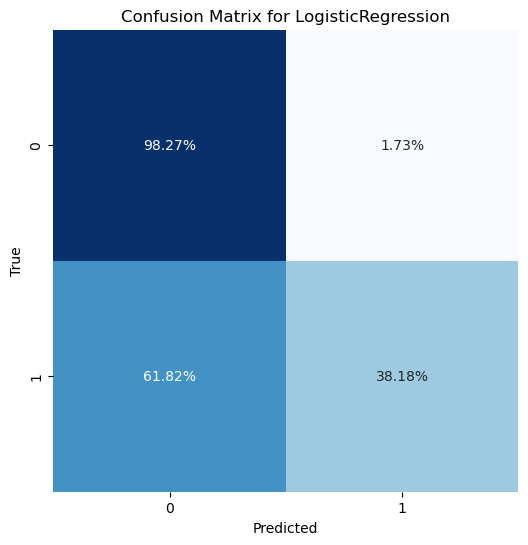

Model: RandomForestClassifier, Accuracy Score: 0.9413
Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       520
           1       0.86      0.79      0.82       110

    accuracy                           0.94       630
   macro avg       0.91      0.88      0.89       630
weighted avg       0.94      0.94      0.94       630



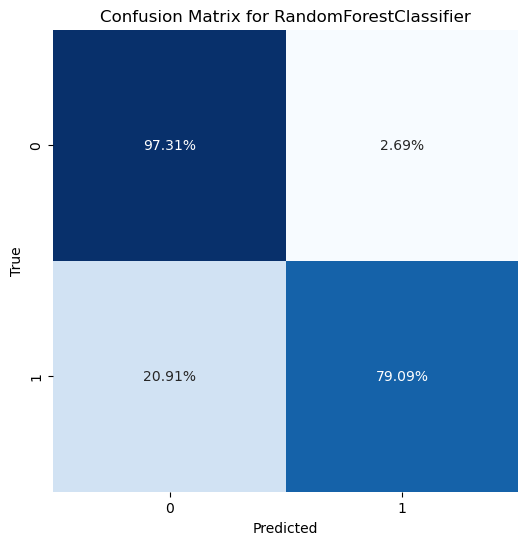

Model: DecisionTreeClassifier, Accuracy Score: 0.9349
Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       520
           1       0.83      0.78      0.81       110

    accuracy                           0.93       630
   macro avg       0.89      0.87      0.88       630
weighted avg       0.93      0.93      0.93       630



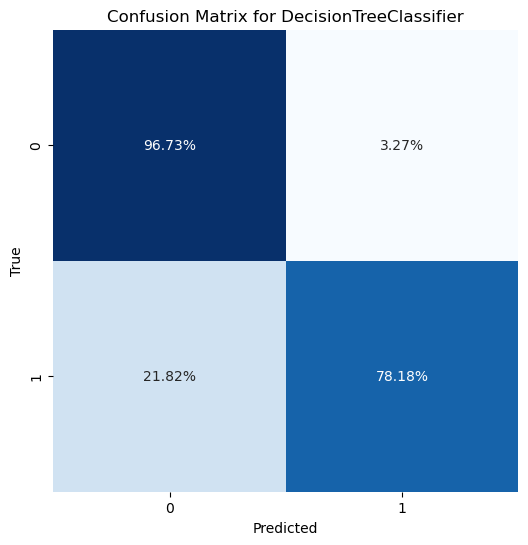

Model: KNeighborsClassifier, Accuracy Score: 0.927
Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       520
           1       0.78      0.82      0.80       110

    accuracy                           0.93       630
   macro avg       0.87      0.88      0.88       630
weighted avg       0.93      0.93      0.93       630



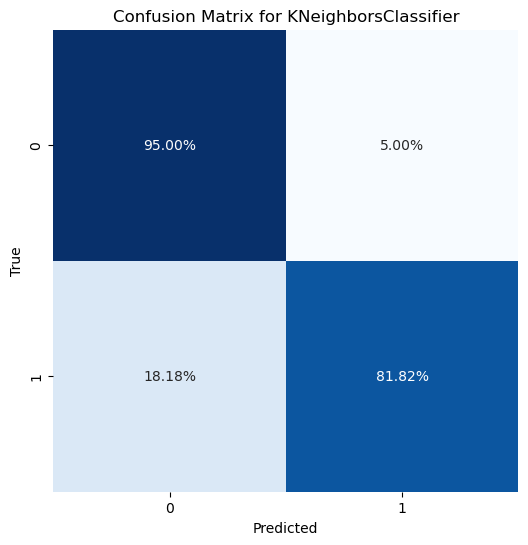

In [65]:
# let me try other modles
# Instantiate the models

lr = LogisticRegression(max_iter=1000)
rc = RandomForestClassifier()
dc = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=3)

models = [lr, rc, dc,knn]
accuracy = []
model_names = []


# Loop through each model for training and evaluation
for model in models:
    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)

   # Calculate and store the accuracy of the model
    accuracy.append(round(accuracy_score(y_test, y_pred), 4))
    model_names.append(type(model).__name__)
    print(f'Model: {type(model).__name__}, Accuracy Score: {round(accuracy_score(y_test, y_pred), 4)}')

    # Print classification report
    report = classification_report(y_test, y_pred)
    print(f'Classification Report for {type(model).__name__}:\n{report}')

# # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred,normalize='true')

    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt=".2%", cmap="Blues", cbar=False,
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {type(model).__name__}')
    plt.show()

All the models have performed better compared to the baseline. since the dataset was imbalanced but random forest performed the best

precision and recall are important metrics because they help measure the effectiveness of your model in identifying customers who are likely to churn (leave your service) and in correctly identifying customers who are not likely to churn.

Precision:  measures the accuracy of the positive predictions made by the model. precision measures the proportion of customers that the model correctly identifies as churners out of all the customers it predicts as churners. A high precision means that the model is good at identifying actual churners, which is important for targeting retention efforts effectively. If precision is low, it means that the model is incorrectly identifying many non-churners as churners, which can lead to unnecessary retention efforts and potentially annoy customers.

Precision=True Positives/(True Positives + false Positives)

Recall: measures the ability of the model to find all the positive instances. It answers the question: "Out of all the actual positive instances, how many did the model correctly identify as positive?".Recall measures the proportion of actual churners that the model correctly identifies as churners out of all the actual churners. A high recall means that the model is good at capturing most of the churners, which is important for taking timely action to prevent them from leaving. If recall is low, it means that the model is missing many actual churners, which can result in lost customers and revenue.

Recall = True Positives/(True Positives + false negatives)

high precision ensures that the retention efforts are targeted effectively, while high recall ensures that most of the churners are captured

### Model interpration
**Logistic Regression**:

Accuracy Score: 0.8778\
Precision: 0.88 for class 0, 0.82 for class 1\
Recall: 0.98 for class 0, 0.38 for class 1\
F1-score: 0.93 for class 0, 0.52 for class 1\
Interpretation: This model has high accuracy and precision for predicting class 0, but lower recall and precision for predicting class 1. This means that while the model is good at identifying class 0, it struggles more with classifying class 1.


**Random Forest Classifier**:

Accuracy Score: 0.9413\
Precision: 0.96 for class 0, 0.86 for class 1\
Recall: 0.97 for class 0, 0.79 for class 1\
F1-score: 0.96 for class 0, 0.82 for class 1\
Interpretation: This model has a higher overall accuracy compared to Logistic Regression. It performs well in precision and recall for both classes, indicating it's better at predicting both classes compared to Logistic Regression.

**Decision Tree Classifier**:

Accuracy Score: 0.9349\
Precision: 0.95 for class 0, 0.83 for class 1\
Recall: 0.97 for class 0, 0.78 for class 1\
F1-score: 0.96 for class 0, 0.81 for class 1\
Interpretation: This model has similar performance to the Random Forest Classifier, with slightly lower precision and recall for class 1.

**K-Nearest Neighbors Classifier**:

Accuracy Score: 0.927\
Precision: 0.96 for class 0, 0.78 for class 1\
Recall: 0.95 for class 0, 0.82 for class 1\
F1-score: 0.96 for class 0, 0.80 for class 1\
Interpretation: This model has good overall accuracy but slightly lower precision and recall for class 1 compared to the Random Forest and Decision Tree classifiers.

e Random Forest Classifier has the highest overall accuracy and performs consistently well across precision, recall, and F1-score for both classes.

I will use the best performing model which random forest to perform some hyperparameter tuning


### RESAMPLING
There are various way to resample your data.\
You can use SMOTE, randomoversampler,randomundersampler\
All of them have their advantanges and disadvantanges\
I decided to try randomoversampler in this project

It is always recommended to resample on the training data to avoid any leakages/

In [66]:
# Resampling
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train,y_train)

In [67]:
X_train_over_1, X_test_over_1, y_train_over_1, y_test_over_1 = train_test_split(
    X_train_over, y_train_over, test_size=0.2, random_state=42
)

### Hyperparameter tuning

In [68]:
# Then do some hyperparameter tuning- this helps in increasing accuracy
# I will use gridserach cv then use the model in the increaesd train data
params = {
    "n_estimators":range(25,100,25),
    "max_depth":range(10,50,10)
}
params


{'n_estimators': range(25, 100, 25), 'max_depth': range(10, 50, 10)}

Use the best estimators from hypeparmeter tunignto fit the model

In [70]:
model = GridSearchCV(rc,param_grid=params,cv=5,n_jobs=-1,verbose=1)

In [71]:
model.fit(X_train_over_1, y_train_over_1)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [72]:
best_params = model.best_params_
print(best_params)

{'max_depth': 40, 'n_estimators': 50}


In [73]:
rc_1=RandomForestClassifier(max_depth=40,n_estimators=50)

In [74]:
rc_1.fit(X_train_over_1,y_train_over_1)

RandomForestClassifier(max_depth=40, n_estimators=50)

In [75]:
y_rc_pred=rc_1.predict(X_test_over_1)

As you can see the accuracy of the random forest has increased after increasing the samples and performing hyperparmeter tuning

In [76]:
print(accuracy_score(y_test_over_1, y_rc_pred), 4)

0.9730679156908665 4


Classification Report               precision    recall  f1-score   support

           0       0.99      0.96      0.97       436
           1       0.96      0.99      0.97       418

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



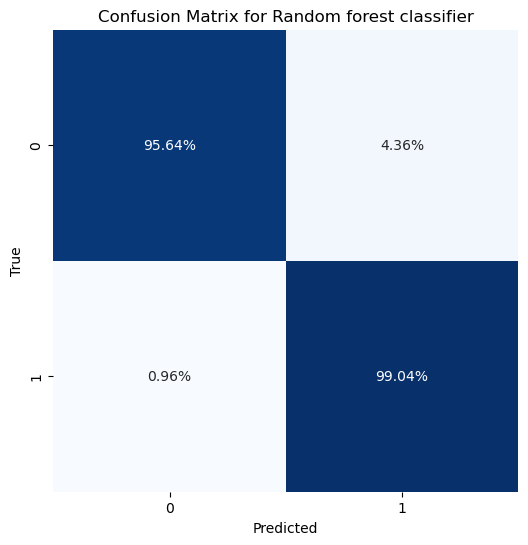

In [77]:
# check confusion matricx and classification report

# Print classification report
report = classification_report(y_test_over_1, y_rc_pred)
print(f'Classification Report {report}')

# # Compute confusion matrix
cm = confusion_matrix(y_test_over_1, y_rc_pred,normalize='true')

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt=".2%", cmap="Blues", cbar=False,
            xticklabels=rc_1.classes_, yticklabels=rc_1.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for Random forest classifier')
plt.show()

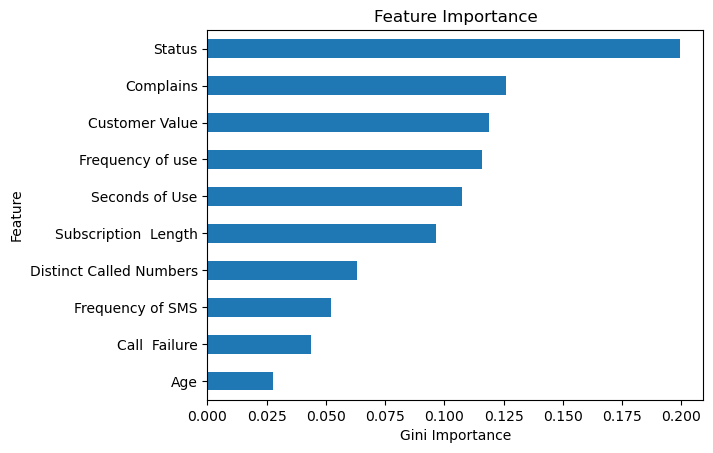

In [80]:
# check the feature importance
# Get feature names from training data
features= X.columns
# Extract importances from model
importances=model.best_estimator_.feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances,index=features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [81]:
df = pd.DataFrame(data={"Actual Values": y_test_over_1, "Predictions": y_rc_pred})
pd.options.display.float_format = '{:.2f}'.format
df.head()

,Actual Values,Predictions
1703,0,0
1173,0,0
308,0,0
1322,1,1
3271,1,1
